<img src="https://fastapi.tiangolo.com/img/logo-margin/logo-teal.png">

# An Introduction to Using FastAPI

## What is an API?

**APIs** are mechanisms that enable two software components to **communicate** with each other using a set of **definitions** and **protocols**. For example, the weather bureau's software system contains daily weather data. The weather app on your phone "talks" to this system via APIs and shows you daily weather updates on your phone.

## How do APIs work?

API architecture is usually explained in terms of **client** and **server**. The application sending the **request** is called the client, and the application sending the **response** is called the server. So in the weather example, the bureau's weather database is the server, and the mobile app is the client.

* SOAP APIs
* RPC APIs
* Websocket APIs
* REST APIs

## What is an API endpoint and why is it important?

API endpoints are the final **touchpoints** in the API communication system. These include server URLs, services, and other specific digital locations from where **information is sent and received between systems**. API endpoints are critical to enterprises for two main reasons:

* Security
* Performance

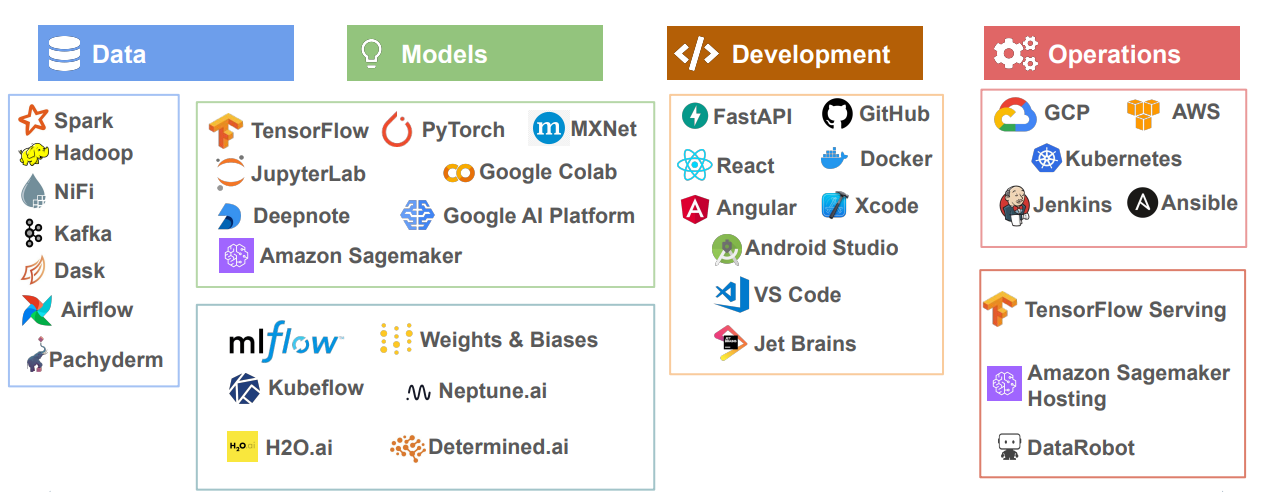

In [ ]:
# %%capture
# !pip install fastapi uvicorn pyngrok python-multipart jinja2 pydantic

In [ ]:
from fastapi import FastAPI, HTTPException, Form, Request
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
from jinja2 import Template

from pydantic import BaseModel

import uvicorn
import requests

import nest_asyncio
from pyngrok import ngrok

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib

from enum import Enum
from typing import Optional, List
# from uuid import UUID, uuid4

## Basics

In [ ]:
app = FastAPI()

class Item(BaseModel):
    item_name: str

models = [
    {"model_name": "Linear Regression"},
    {"model_name": "Logistic Regression"},
    {"model_name": "Random Forest"},
]

@app.get('/')
async def root():
    return {'hello': 'world'}

@app.get("/models/")
async def read_items(skip=0, limit=10):
    return models

@app.post("/models/")
async def create_item(item: Item, response_model=Item):
    new_item = {"model_name": item.item_name}
    models.append(new_item)
    return new_item

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [ ]:
# url = "https://de32-34-75-11-184.ngrok.io/models/"
# headers={"Content-Type": "application/json"}
# response = requests.post(url, headers=headers, json={"item_name":"test"})

In [ ]:
app = FastAPI()

models = [
    {"model_name": "Linear Regression"},
    {"model_name": "Logistic Regression"},
    {"model_name": "Random Forest"},
]

@app.get('/')
async def root():
    return "WELCOME TO AI DOJO"

@app.get("/models/")
async def read_models(skip=0, limit=10):
    return models

@app.get("/models/{model_name}")
async def create_model(model_name):
    new_item = {"model_name": model_name}
    models.append(new_item)
    return new_item

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

## Query Parameters

In [ ]:
app = FastAPI()

@app.get('/')
async def root():
    return "WELCOME TO AI DOJO"

@app.get("/info/")
async def create_item(name:str, age:int):
    return f"{name}, {age}"

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

## Pydantic BaseModel

In [ ]:
app = FastAPI()

class NeuralNetwork(BaseModel):
    layers:int
    activation:str
    is_cnn:bool

@app.get('/')
async def root():
    return "Welcome to AI DOJO"


@app.post("/neural/")
async def neural(arch:NeuralNetwork):
    return arch

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [ ]:
# YOUR TURN MAKE A POST REQUEST WITH REQUESTS LIBRARY

## Response Model

In [ ]:
app = FastAPI()

class TestIn(BaseModel):
    user_name:str
    age:int
    pwd:str

class TestResponse(BaseModel):
    user_name:str
    age:int

@app.get('/')
async def root():
    return "Welcome to AI DOJO"


@app.post("/info/", response_model=TestResponse)
async def neural(info:TestIn):
    return info

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [ ]:
# url = "https://90e5-34-75-11-184.ngrok.io/info/"

# headers={"Content-Type": "application/json"}
# data={"user_name":"mohammed", "age":23, "pwd":"test"}
# response = requests.post(url, headers=headers, json=data)

# print(response.text)

## TODO App

In [ ]:
app = FastAPI()

class Task(BaseModel):
    title: str
    description: str = None
    done: bool = False

tasks = []

@app.get("/")
async def main():
    return "TODO APP"

@app.post("/tasks/", response_model=Task)
async def create_task(task: Task):
    new_task = task.dict()
    tasks.append(new_task)
    return new_task

@app.get("/tasks/", response_model=list[Task])
async def read_tasks():
    return tasks

@app.put("/tasks/{task_id}", response_model=Task)
async def update_task(task_id: int, task: Task):
    if task_id < 0 or task_id >= len(tasks):
        raise HTTPException(status_code=404, detail="Task not found")
    tasks[task_id] = task.dict()
    return tasks[task_id]

@app.delete("/tasks/{task_id}", response_model=Task)
async def delete_task(task_id: int):
    if task_id < 0 or task_id >= len(tasks):
        raise HTTPException(status_code=404, detail="Task not found")
    deleted_task = tasks.pop(task_id)
    return deleted_task

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [ ]:
# YOUR TURN ADD SOME DATA TO APP

In [ ]:
app = FastAPI()

@app.post("/")
async def main(name: str = Form(...), age: int = Form(...)):
    return {"name":name, "age":age}

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

## User Model

In [ ]:
class Gender(str, Enum):
    male = "male"
    female = "female"

class Role(str, Enum):
    admin = "admin"
    user = "user"
    student = "student"

class User(BaseModel):
    id: Optional[int] = 0
    first_name: str
    last_name: str
    gender: Gender
    roles: List[Role]

In [ ]:
app = FastAPI()

db: List[User] = [
    User(
        id=0,
        first_name="mohammed",
        last_name="ali",
        gender=Gender.male,
        roles=[Role.admin, Role.user]
        ),
    User(
        id=3,
        first_name="ali",
        last_name="ahmed",
        gender=Gender.male,
        roles=[Role.student]
        )
]

In [ ]:
@app.get("/api/v1/users")
async def fetch_users():
    return db

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [ ]:
# YOUR TURN CREATE register_user() FUNCTION TO ADD USER TO db

## Jinja Templates

In [ ]:
%%writefile templates/index.html
<!DOCTYPE html>
<html>
<head>
    <title>{{ title }}</title>
</head>
<body>
    <h1>Hello, FastAPI with Jinja in Colab!</h1>
</body>
</html>

Overwriting templates/index.html


In [ ]:
app = FastAPI()

templates = Jinja2Templates(directory="/content/templates")

# Route to render the index.html template
@app.get("/", response_class=HTMLResponse)
async def read_index(request: Request):
    context = {"title": "FastAPI with Jinja in Colab", "request":request}
    return templates.TemplateResponse("index.html", context)

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

## TODO App with Jinja

In [ ]:
app = FastAPI()

templates = Jinja2Templates(directory="templates")

tasks = []

@app.get("/", response_class=HTMLResponse)
async def read_index(request: Request):
    return templates.TemplateResponse("index.html", {"request": request, "tasks": tasks})

@app.post("/add-task/")
async def add_task(request: Request, title: str = Form(...), description: str = Form(...)):
    new_task = {"title": title, "description": description, "done": False}
    tasks.append(new_task)
    return {"message": "Task added successfully"}

# Route to delete a task
@app.post("/delete-task/")
async def delete_task(request: Request, task_index: int = Form(...)):
    if 0 <= task_index < len(tasks):
        del tasks[task_index]
    return {"message": "Task deleted successfully"}

In [ ]:
!mkdir templates

%%writefile templates/index.html
<!DOCTYPE html>
<html>
<head>
    <title>TODO App</title>
</head>
<body>
    <h1>TODO App</h1>
    <ul>
        {% for index, task in tasks %}
        <li>{{ task.title }} - {{ task.description }} <button onclick="deleteTask({{ index }})">Delete</button></li>
        {% endfor %}
    </ul>
    <form action="/add-task/" method="post">
        <label for="title">Title:</label>
        <input type="text" id="title" name="title" required><br>
        <label for="description">Description:</label>
        <input type="text" id="description" name="description" required><br>
        <button type="submit">Add Task</button>
    </form>

    <script>
        function deleteTask(index) {
            const form = document.createElement("form");
            form.method = "post";
            form.action = "/delete-task/";

            const taskIndex = document.createElement("input");
            taskIndex.type = "hidden";
            taskIndex.name = "task_index";
            taskIndex.value = index;

            form.appendChild(taskIndex);
            document.body.appendChild(form);
            form.submit();
        }
    </script>
</body>
</html>

Writing templates/index.html


## With Machine Learning Models

In [ ]:
X_train = np.array([[1000, 2], [1500, 3], [2000, 4]])
y_train = np.array([200000, 300000, 400000])

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
app = FastAPI()

model = joblib.load("model.pkl")

class HouseInput(BaseModel):
    sqft: float
    bedrooms: int

@app.get("/")
async def index():
    return "Welcome to AI DOJO"

@app.post("/predict/")
async def predict_price(house_data: HouseInput):
    try:
        sqft = house_data.sqft
        bedrooms = house_data.bedrooms
        predicted_price = model.predict([[sqft, bedrooms]])

        return {"predicted_price": predicted_price[0]}
    except:
        return "Prediction failed"

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [ ]:
# YOUR TURN MAKE A POST REQUEST

In [ ]:
# YOUR TURN WITH LOGISTIC REGRESSION MODEL (CREATE RANDOM DATA)